In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils

In [111]:
# Load all datasets
lalonde, nswre, cps_control, psid_control, cps2_control, cps3_control, psid2_control, psid3_control = utils.load_data()

# Combined datasets
nswre_cps, nswre_cps2, nswre_cps3, nswre_psid, nswre_psid2, nswre_psid3 = utils.load_combinations(nswre, cps_control, cps2_control, cps3_control,  psid_control, psid2_control, psid3_control)

In [95]:
nswre

,treatment,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,0,23,10,1,0,0,1,0.00,0.00,0.000
1,0,26,12,0,0,0,0,0.00,0.00,12383.680
2,0,22,9,1,0,0,1,0.00,0.00,0.000
3,0,18,9,1,0,0,1,0.00,0.00,10740.080
4,0,45,11,1,0,0,1,0.00,0.00,11796.470
...,...,...,...,...,...,...,...,...,...,...
180,1,33,12,1,0,1,0,20279.95,10941.35,15952.600
181,1,25,14,1,0,1,0,35040.07,11536.57,36646.950
182,1,35,9,1,0,1,1,13602.43,13830.64,12803.970
183,1,35,8,1,0,1,1,13732.07,17976.15,3786.628


In [118]:
def histogram_comparison(datasets: [], variable: 'str', binwidth: int, names=None, xlim=None) -> None:
    # Create a histogram for the variable of interest for each dataset
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(8,12))
    i = 1
    for dataset in datasets:
        plt.subplot(len(datasets), 1, i)
        ax = sns.histplot(data=dataset[variable], legend=False, binwidth=binwidth)
        if xlim is not None:
            ax.set(xlim=xlim)
        if names is not None:
            plt.title(names[i-1])
        plt.xlabel(None) # remove xlabels
        i = i+1
    # Add Title
    plt.suptitle(f"{variable.capitalize()}", x=0.5, y=0.95, ha='center', fontsize='x-large')
    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.5)
    plt.show()


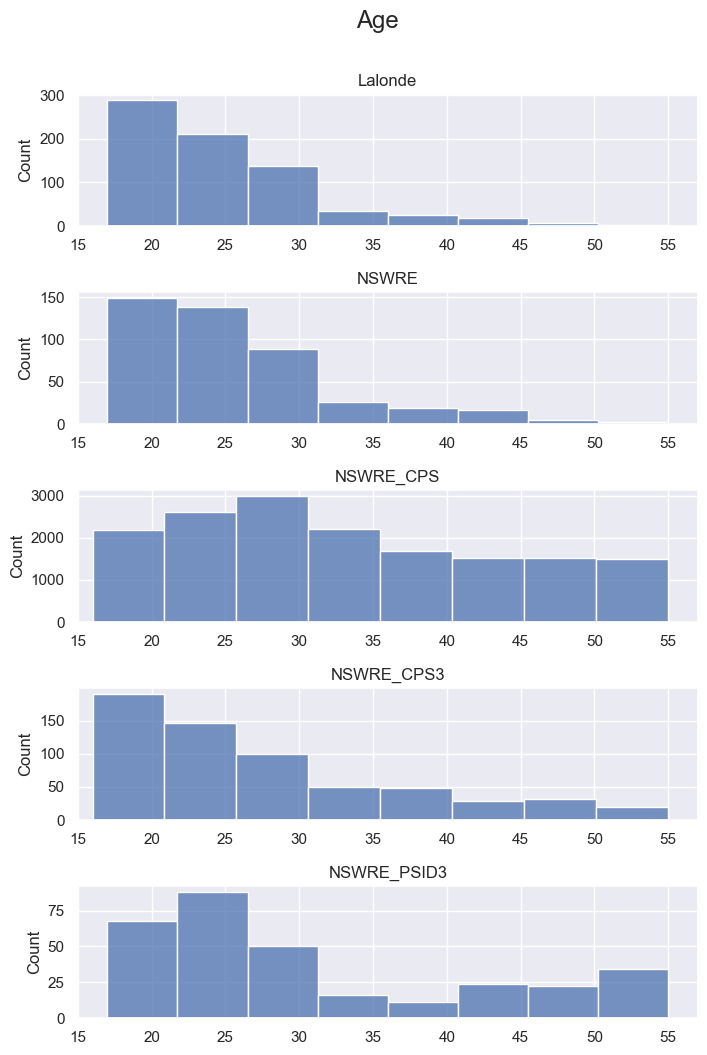

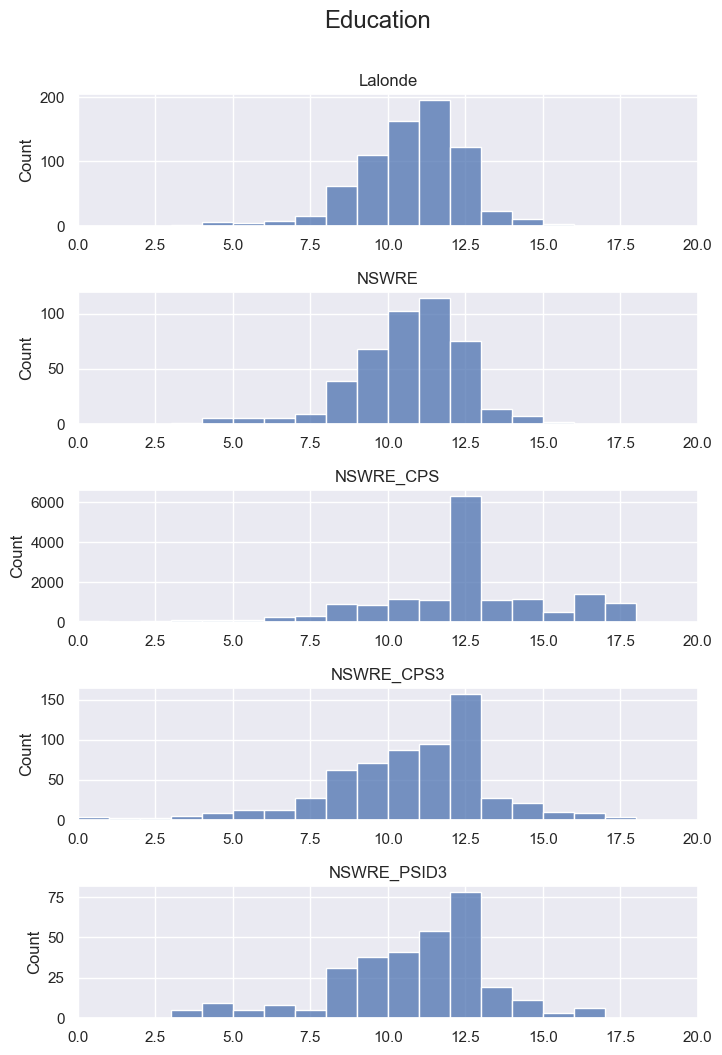

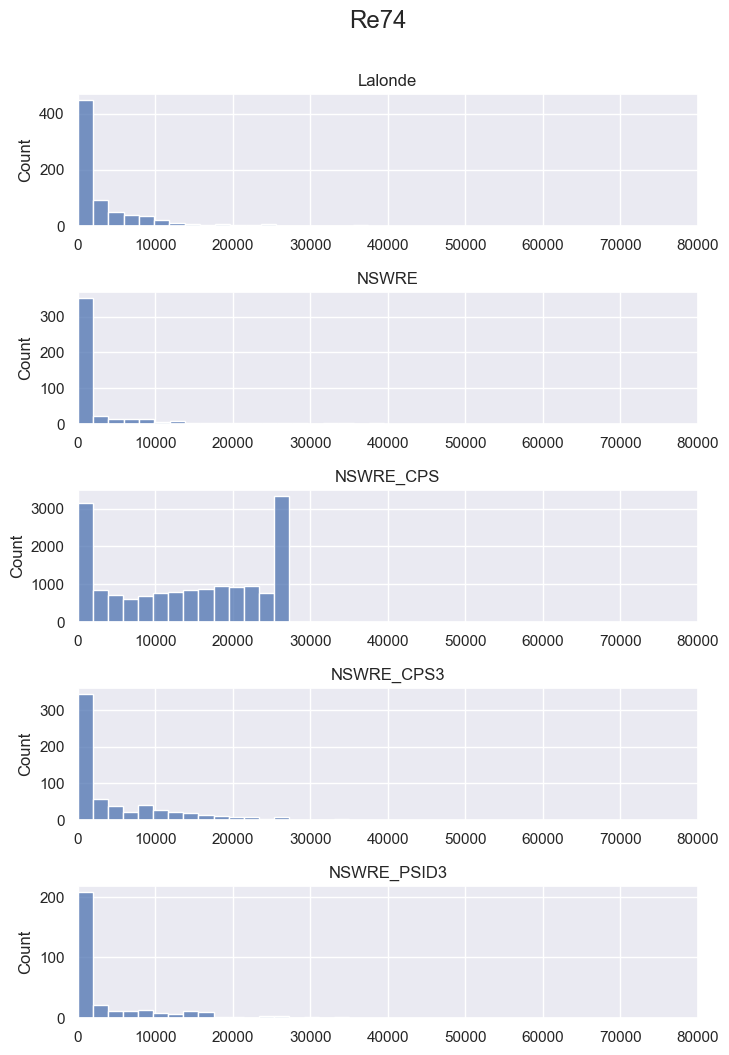

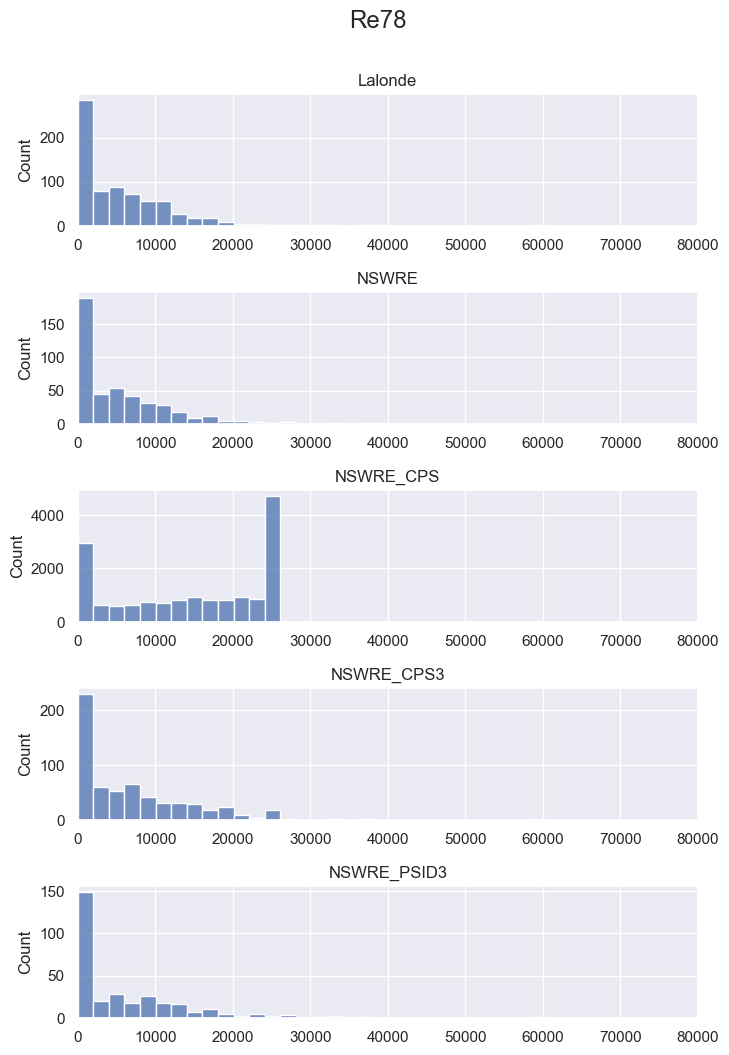

In [119]:
datasets = [lalonde, nswre, 
            #cps_control, psid_control, 
            nswre_cps, nswre_cps3, nswre_psid3]
names = ['Lalonde', 'NSWRE', 
         #'CPS', 'PSID', 
         'NSWRE_CPS', 'NSWRE_CPS3', 'NSWRE_PSID3']
variables = ['age', 'education', 're74', 're78']

histogram_comparison(datasets, variable='age', binwidth=5, names=names, xlim=(15,57))

histogram_comparison(datasets, variable='education', binwidth=1, names=names, xlim=(0, 20))

histogram_comparison(datasets, variable='re74', binwidth=2000, names=names, xlim=(0, 80000))

histogram_comparison(datasets, variable='re78', binwidth=2000, names=names, xlim=(0, 80000))

In [98]:
def binary_comparison(datasets: [], dataset_names: [], variables) -> None:
    # Compare binary variables from multiple datasets in a bar chart
    #comparison_df = pd.DataFrame(columns=['dataset', 'variable', 'value'])
    data = []
    
    # Create a DataFrame with values for each dataset & variable combination
    for variable in variables:
        i = 0
        for dataset in datasets:
            value = dataset[variable].sum() / len(dataset[variable])
            data.append([dataset_names[i], variable.capitalize(), value])
            i = i+1
    comparison_df = pd.DataFrame(data, columns=['dataset', 'variable', 'value'])
    
    # Plot DataFrame in a nested barplot
    sns.set_theme(style="darkgrid")
    sns.catplot(data=comparison_df, kind='bar',
                x='variable', y='value', hue='dataset')
    plt.ylabel('Share of positive (1) observations')
    plt.xlabel('Variable of Interest')
    plt.title('Distribution of Binary Variables in Datasets')

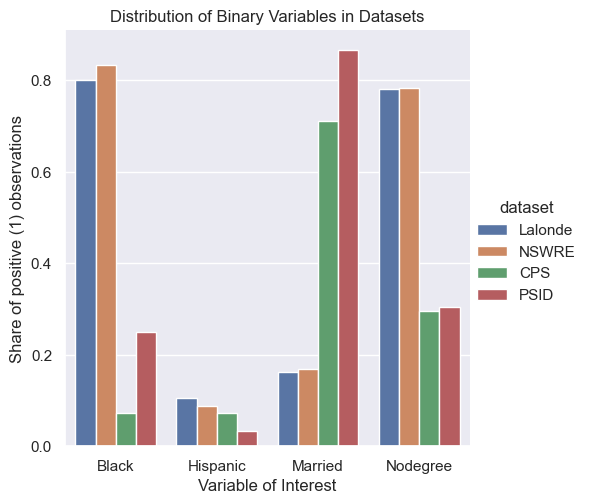

In [99]:
variables = ['black', 'hispanic', 'married', 'nodegree']
df = binary_comparison(datasets, names, variables)
df

In [104]:
def correlation_comparison(datasets: [], variables: [], names: [] = None) -> None:
    # Create correlation heatmaps for a list of variables in each of the datasets
    plt.figure(figsize=(12,8))
    i = 0
    for dataset in datasets:
        plt.subplot(2, 2, i+1)
        corr_mat = dataset[variables].corr()
        sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        if names is not None:
            plt.title(names[i])
        i = i+1
    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.5)
    
    plt.suptitle('Correlation Heatmaps for Selected Variables', y=0.95)
    plt.plot()
    
    

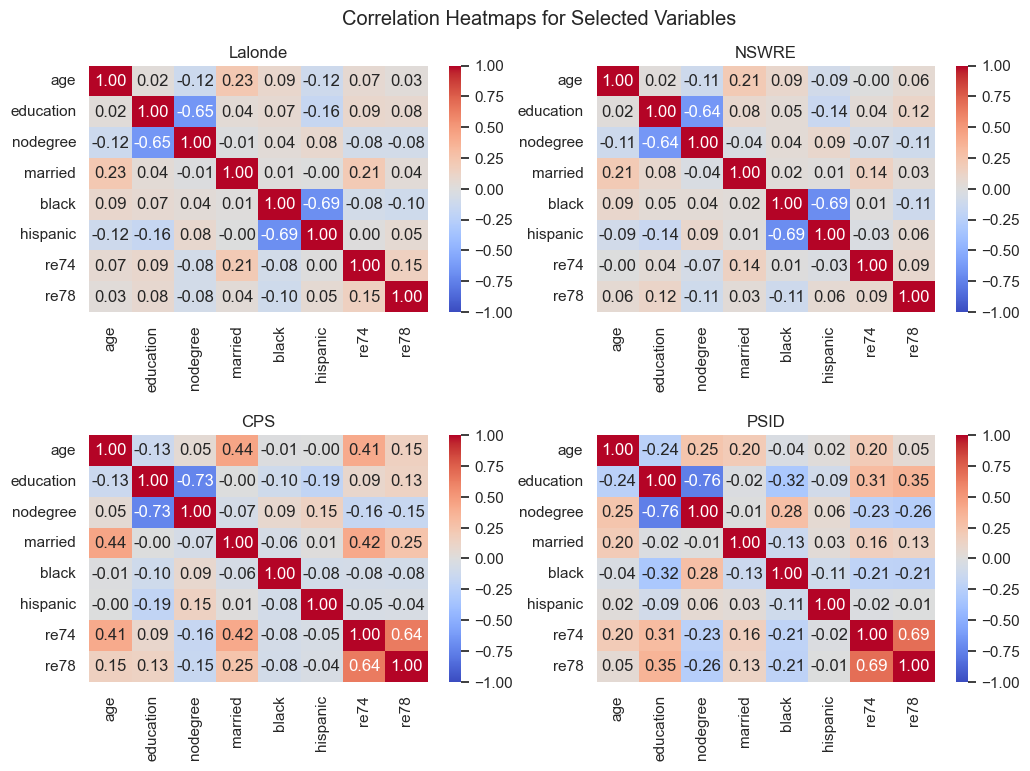

In [107]:
variables = ['age', 'education', 'nodegree', 'married', 'black', 'hispanic', 're74', 're78']

correlation_comparison(datasets, variables, names)

In [109]:
lalonde[lalonde['nodegree'] == 0]['education'].value_counts()

education
12    122
13     23
14     11
15      2
16      1
Name: count, dtype: int64